<a href="https://colab.research.google.com/github/hitmanrj/Projeccts/blob/main/Car_Price_Predictor_Machine_Learning_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from math import sqrt
import plotly.express as px
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
import time
import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
df = pd.read_csv('/content/Car Price Prediction.csv')

In [ ]:
df.size

346266

In [ ]:
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,6,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3.0,192000,6,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000,4,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966,4,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901,4,Automatic,Front,04-May,Left wheel,Silver,4


In [ ]:
df.shape

(19237, 18)

In [ ]:
df.columns

Index(['ID', 'Price', 'Levy', 'Manufacturer', 'Model', 'Prod. year',
       'Category', 'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Airbags'],
      dtype='object')

In [ ]:
df.describe()

,ID,Price,Prod. year,Engine volume,Mileage,Cylinders,Airbags
count,1.923700e+04,1.923700e+04,19237.000000,19237.000000,1.923700e+04,19237.000000,19237.000000
mean,4.557654e+07,1.855593e+04,2010.912824,2.307990,1.532236e+06,4.582991,6.582627
std,9.365914e+05,1.905813e+05,5.668673,0.877805,4.840387e+07,1.199933,4.320168
min,2.074688e+07,1.000000e+00,1939.000000,0.000000,0.000000e+00,1.000000,0.000000
25%,4.569837e+07,5.331000e+03,2009.000000,1.800000,7.013900e+04,4.000000,4.000000
50%,4.577231e+07,1.317200e+04,2012.000000,2.000000,1.260000e+05,4.000000,6.000000
75%,4.580204e+07,2.207500e+04,2015.000000,2.500000,1.888880e+05,4.000000,12.000000
max,4.581665e+07,2.630750e+07,2020.000000,20.000000,2.147484e+09,16.000000,16.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  float64
 10  Mileage           19237 non-null  int64  
 11  Cylinders         19237 non-null  int64  
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

Data Cleaning

In [ ]:
df.isnull().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

In [ ]:
df.ID.duplicated().sum()

313

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.drop('ID', axis=1)

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,6,Automatic,4x4,04-May,Left wheel,Silver,12
1,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3.0,192000,6,Tiptronic,4x4,04-May,Left wheel,Black,8
2,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000,4,Variator,Front,04-May,Right-hand drive,Black,2
3,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966,4,Automatic,4x4,04-May,Left wheel,White,0
4,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901,4,Automatic,Front,04-May,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,8467,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0,300000,4,Manual,Rear,02-Mar,Left wheel,Silver,5
19233,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600,4,Tiptronic,Front,04-May,Left wheel,Red,8
19234,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2.0,116365,4,Automatic,Front,04-May,Left wheel,Grey,4
19235,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2.0,51258,4,Automatic,Front,04-May,Left wheel,Black,4


Cleaning the noisy values in the features

In [ ]:
df.Levy.value_counts()

-       5709
765      482
891      453
639      403
640      398
        ... 
3156       1
2908       1
1279       1
1719       1
1901       1
Name: Levy, Length: 559, dtype: int64

In [ ]:
df['Levy']

0        1399
1        1018
2           -
3         862
4         446
         ... 
19232       -
19233     831
19234     836
19235    1288
19236     753
Name: Levy, Length: 18924, dtype: object

In [ ]:
df.replace('-','0' ,inplace = True)
df['Levy'] = df['Levy'].astype(str).astype(int)

Feature Engineering

In [ ]:
df['Age'] = 2022 - df['Prod. year']

In [ ]:
df.head(5)

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Age
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,6,Automatic,4x4,04-May,Left wheel,Silver,12,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3.0,192000,6,Tiptronic,4x4,04-May,Left wheel,Black,8,11
2,45774419,8467,0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000,4,Variator,Front,04-May,Right-hand drive,Black,2,16
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966,4,Automatic,4x4,04-May,Left wheel,White,0,11
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901,4,Automatic,Front,04-May,Left wheel,Silver,4,8


In [ ]:
df['Doors'].unique()

array(['04-May', '02-Mar', '>5'], dtype=object)

In [ ]:
df['Doors'] = df['Doors'].str.replace('4-May','4')
df['Doors'] = df['Doors'].str.replace('2-Mar','2')

In [ ]:
df['Doors']

0        04
1        04
2        04
3        04
4        04
         ..
19232    02
19233    04
19234    04
19235    04
19236    04
Name: Doors, Length: 18924, dtype: object

Detecting and removing outliers

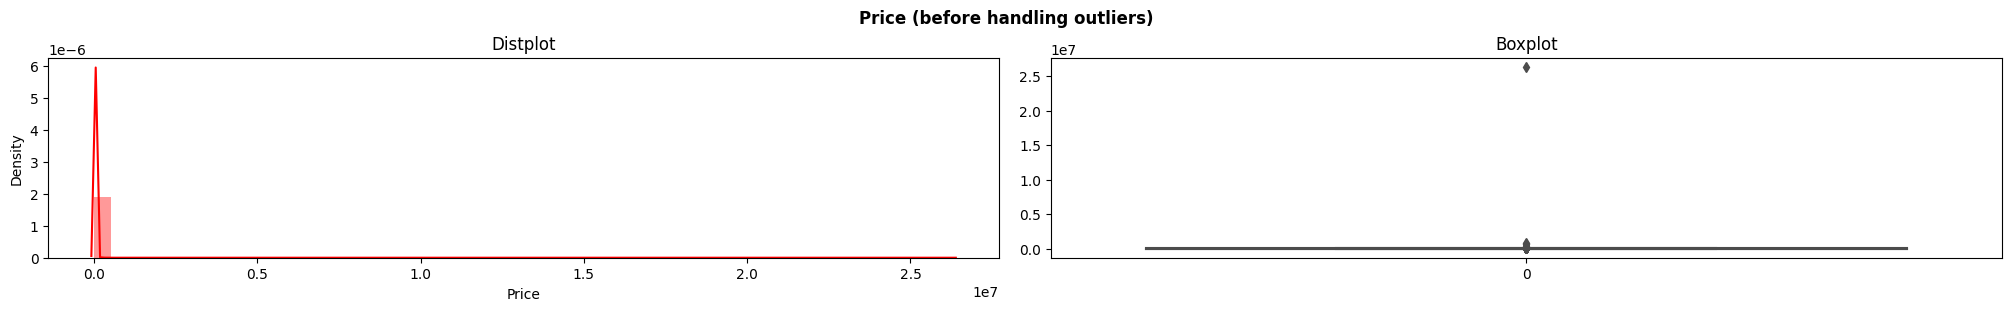

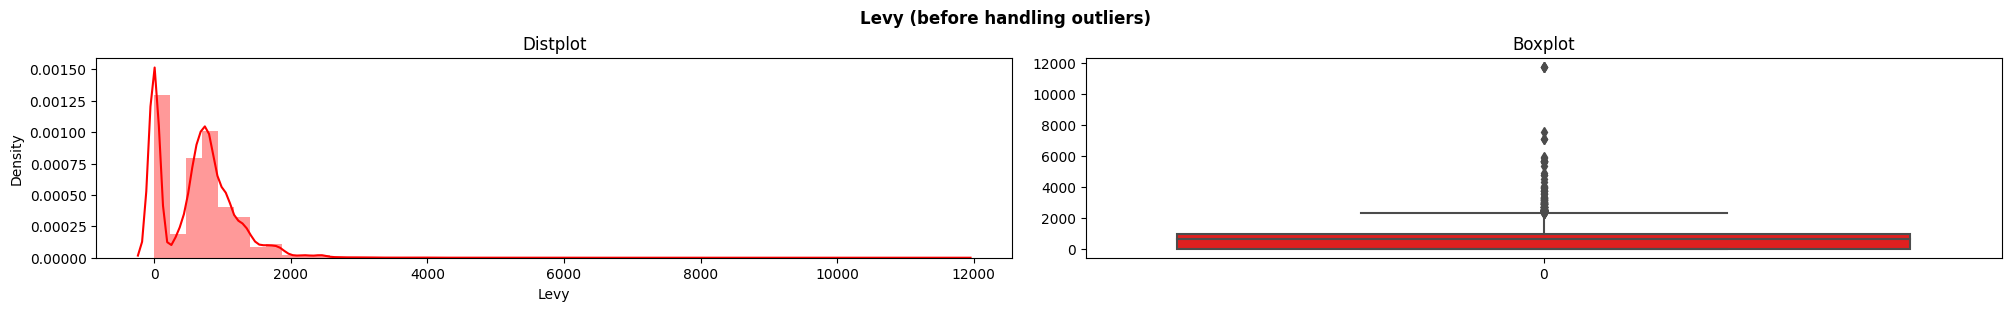

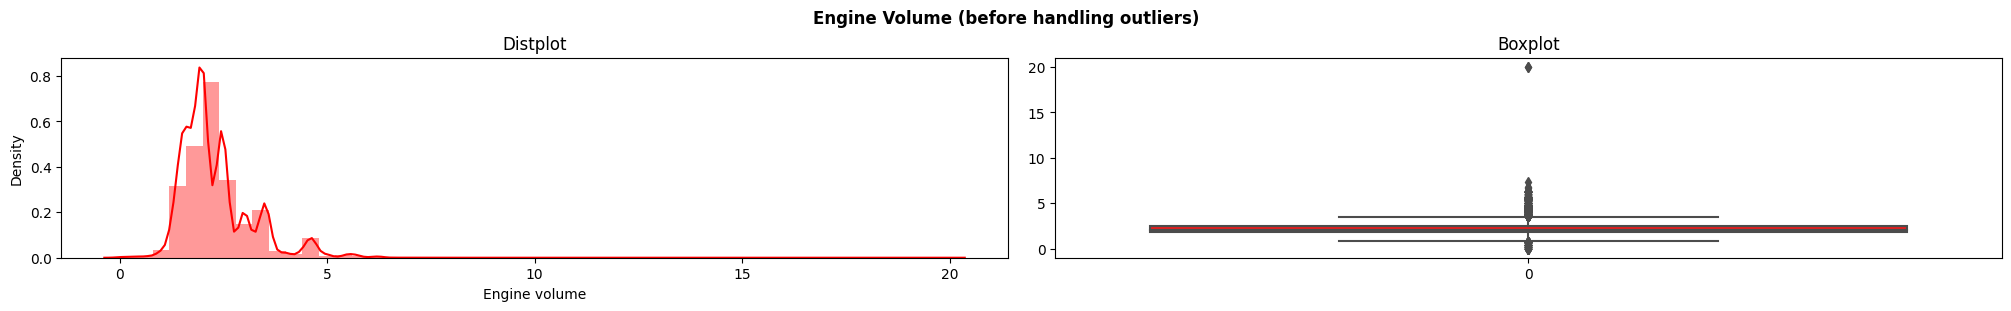

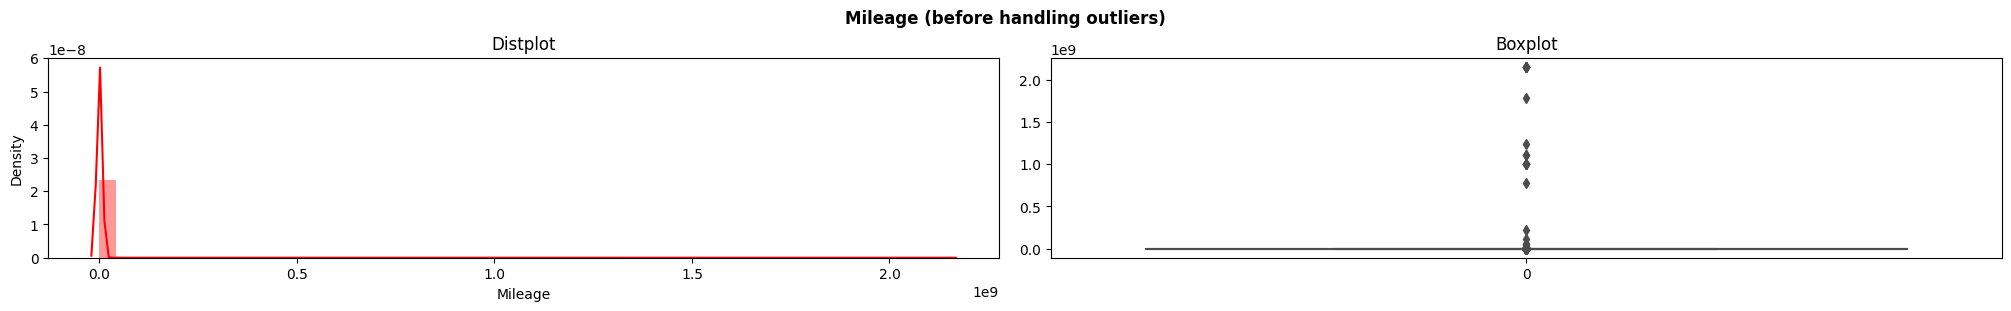

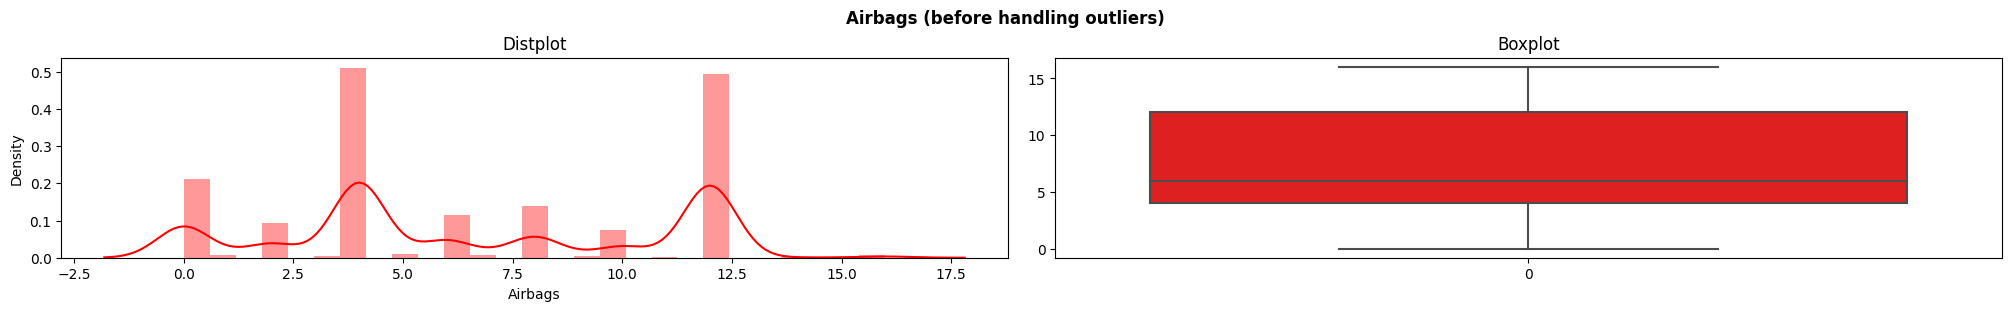

In [ ]:
cont_col = ['Price', 'Levy',  'Engine volume', 'Mileage', 'Airbags']
for col in cont_col:
    fig, ax =plt.subplots(1,2, constrained_layout=True)
    fig.set_size_inches(20, 3)
    sns.distplot(df[col], ax=ax[0],color='red').set(title="Distplot")
    sns.boxplot(df[col], ax=ax[1],color='red').set(title="Boxplot")
    plt.suptitle(f'{col.title()} (before handling outliers)',weight='bold')
    fig.show()

In [ ]:
df[cont_col].describe()

,Price,Levy,Engine volume,Mileage,Airbags
count,1.892400e+04,18924.000000,18924.000000,1.892400e+04,18924.000000
mean,1.858744e+04,632.886493,2.306251,1.555373e+06,6.568379
std,1.921356e+05,568.273736,0.877591,4.880221e+07,4.322323
min,1.000000e+00,0.000000,0.000000,0.000000e+00,0.000000
25%,5.331000e+03,0.000000,1.800000,7.019575e+04,4.000000
50%,1.317200e+04,642.000000,2.000000,1.264000e+05,6.000000
75%,2.206300e+04,917.000000,2.500000,1.891198e+05,12.000000
max,2.630750e+07,11714.000000,20.000000,2.147484e+09,16.000000


In [ ]:
def outlier_prcnt(df, col_list):
    for col_name in col_list:
        q1 = df[col_name].quantile(0.25)
        q3 = df[col_name].quantile(0.75)
        iqr = q3-q1  #IQR
        fence_low  = q1-1.5*iqr
        fence_high = q3+1.5*iqr


        outliers = ((df[col_name] > fence_high) | (df[col_name] < fence_low)).sum()
        total = df[col_name].shape[0]
        print(f"Total outliers in {col_name} are: {outliers} - {round(100*(outliers)/total,2)}%.")

outlier_prcnt(df, cont_col)

Total outliers in Price are: 1055 - 5.57%.
Total outliers in Levy are: 160 - 0.85%.
Total outliers in Engine volume are: 1358 - 7.18%.
Total outliers in Mileage are: 635 - 3.36%.
Total outliers in Airbags are: 0 - 0.0%.


In [ ]:
def outlier_handle(df, col_list):
    df_new = df.copy()
    for col_name in col_list:
        q1 = df[col_name].quantile(0.25)
        q3 = df[col_name].quantile(0.75)
        iqr = q3-q1  #IQR
        fence_low  = q1-1.5*iqr
        fence_high = q3+1.5*iqr
        df_new.loc[:,  col_name] = np.where(df[col_name]> fence_high, fence_high,
                                         np.where(df[col_name]< fence_low, fence_low,
                                                  df[col_name]))
    return df_new
data = outlier_handle(df, cont_col)

After removing the outliers

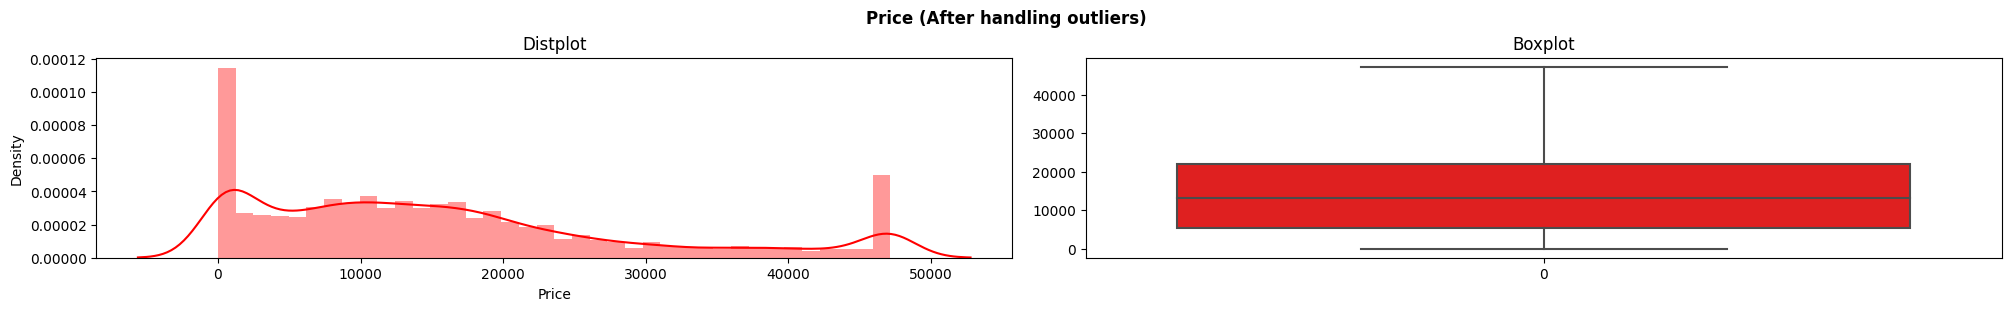

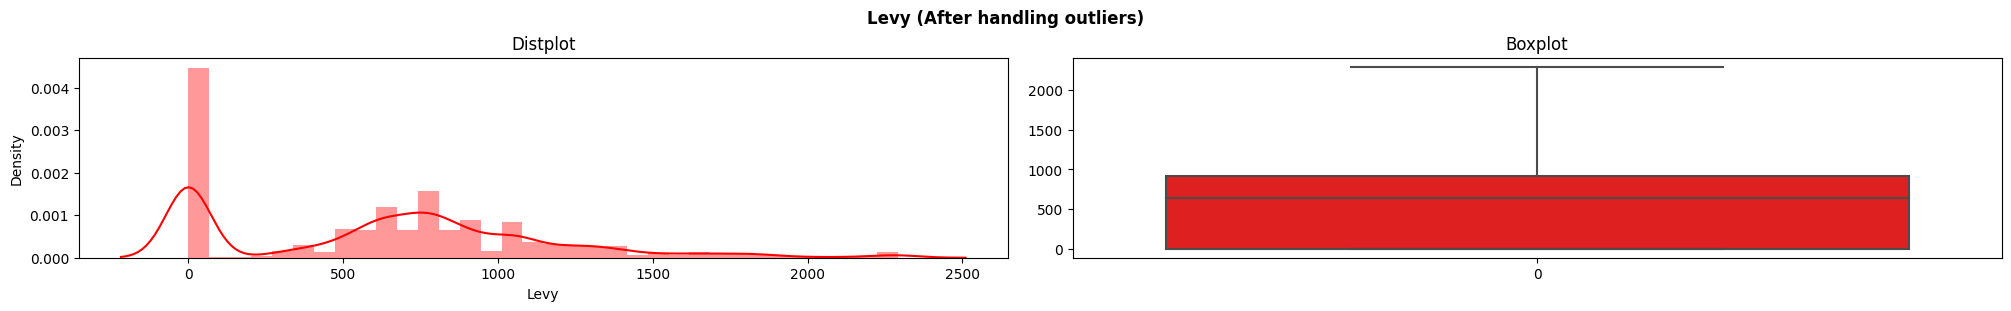

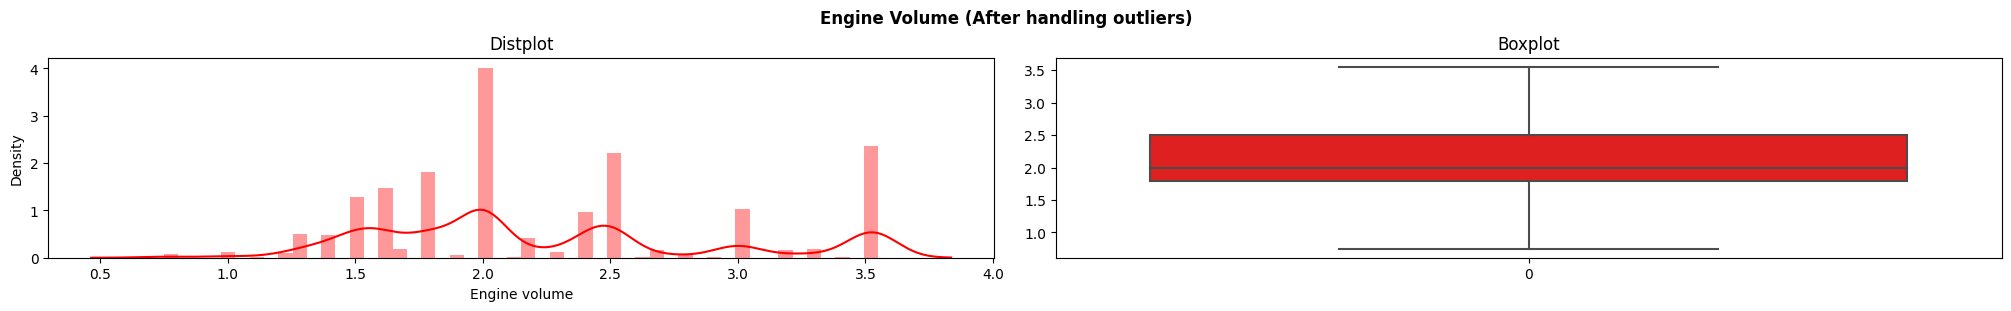

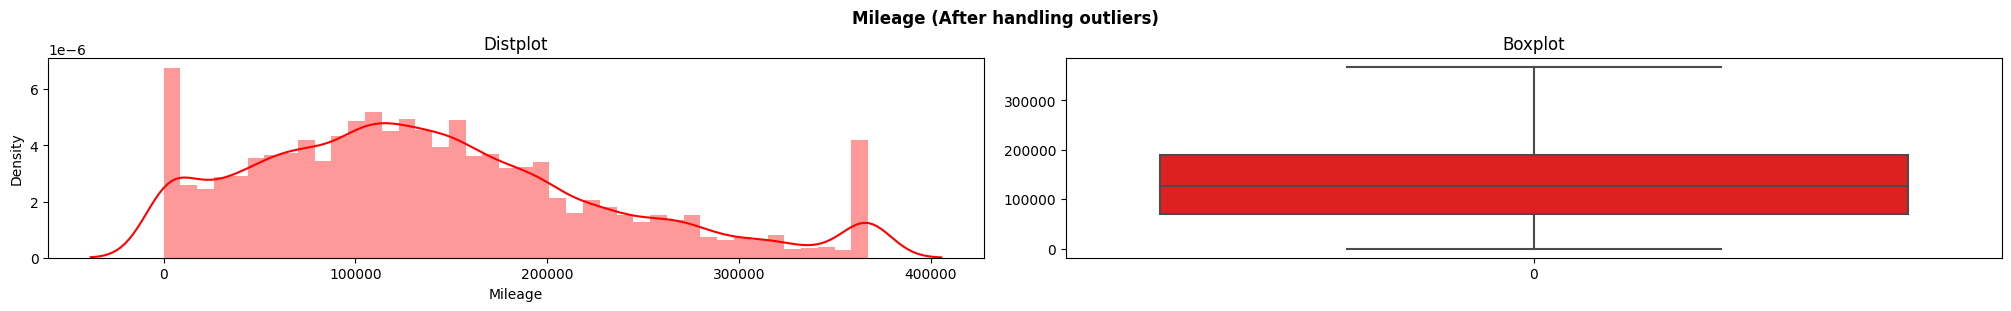

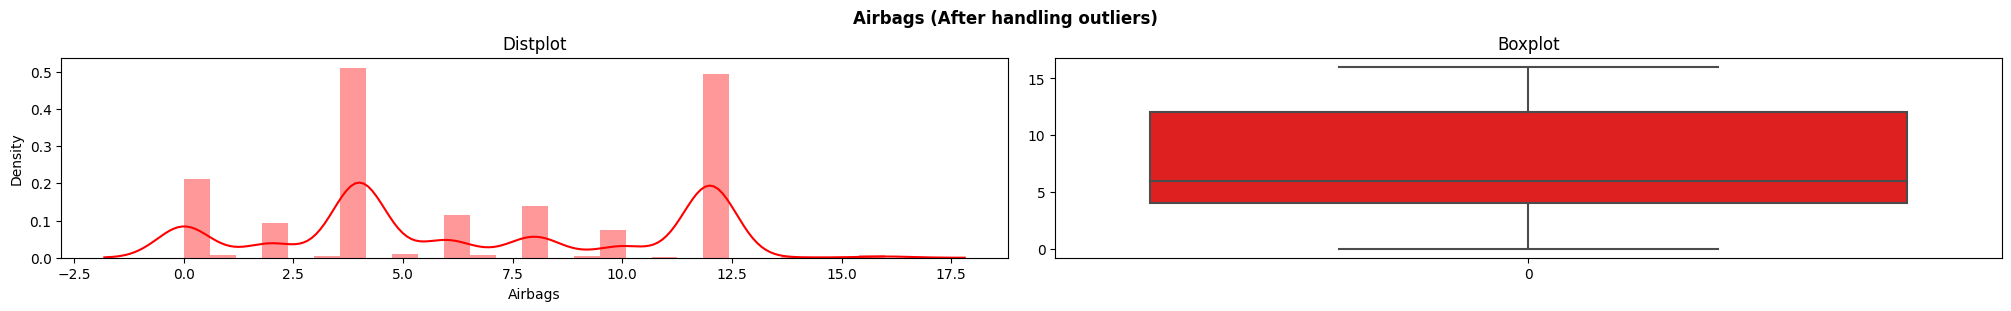

In [ ]:
for col in cont_col:
    fig, ax =plt.subplots(1,2, constrained_layout=True)
    fig.set_size_inches(20, 3)
    sns.distplot(data[col], ax=ax[0],color='red').set(title="Distplot")
    sns.boxplot(data[col], ax=ax[1],color='red').set(title="Boxplot")
    plt.suptitle(f'{col.title()} (After handling outliers)',weight='bold')
    fig.show()

In [ ]:
data[cont_col].describe()


,Price,Levy,Engine volume,Mileage,Airbags
count,18924.000000,18924.000000,18924.000000,18924.000000,18924.000000
mean,15886.559660,625.483249,2.238766,137503.106862,6.568379
std,13420.841661,520.625821,0.682590,90883.265208,4.322323
min,1.000000,0.000000,0.750000,0.000000,0.000000
25%,5331.000000,0.000000,1.800000,70195.750000,4.000000
50%,13172.000000,642.000000,2.000000,126400.000000,6.000000
75%,22063.000000,917.000000,2.500000,189119.750000,12.000000
max,47161.000000,2292.500000,3.550000,367505.750000,16.000000


Performing Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
Manufacturer_le = LabelEncoder()
Model_le = LabelEncoder()
Category_le = LabelEncoder()
Leather_interior_le = LabelEncoder()
Fuel_type_le = LabelEncoder()
Gear_box_type_le = LabelEncoder()
Doors_le  = LabelEncoder()
Wheel_le  = LabelEncoder()
Drive_wheels_le = LabelEncoder()
color_le = LabelEncoder()

In [ ]:
data['Manufacturer'] = Manufacturer_le.fit_transform(data['Manufacturer'])
data['Model'] = Model_le.fit_transform(data['Model'])
data['Category'] = Category_le.fit_transform(data['Category'])
data['Leather interior'] = Leather_interior_le.fit_transform(data['Leather interior'])
data['Fuel type'] = Fuel_type_le.fit_transform(data['Fuel type'])
data['Gear box type'] = Gear_box_type_le.fit_transform(data['Gear box type'])
data['Doors'] = Doors_le.fit_transform(data['Doors'])
data['Wheel'] = Wheel_le.fit_transform(data['Wheel'])
data['Drive wheels'] = Drive_wheels_le.fit_transform(data['Drive wheels'])
data['Color'] = color_le.fit_transform(data['Color'])


Showing the correlation of the independent variables with the dependent variable

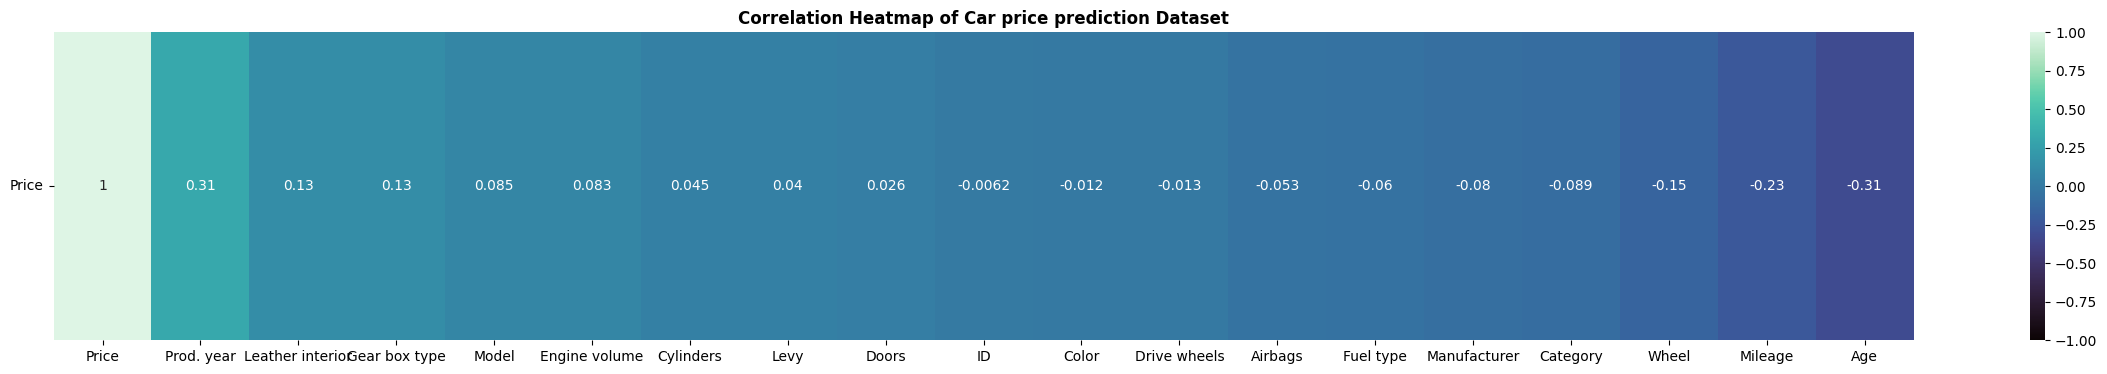

In [ ]:
Target_corr  = data.corr().loc[:, 'Price'].to_frame().sort_values(by = 'Price' , ascending=False).T
plt.figure(figsize=(30,4))
plot = sns.heatmap(Target_corr, annot=True, cmap='mako', vmin = -1)
plt.title('Correlation Heatmap of Car price prediction Dataset', weight='bold')
plot.set_xticklabels(plot.get_xticklabels(), rotation=0, horizontalalignment='center')
plot.set_yticklabels(plot.get_yticklabels(), rotation=0, horizontalalignment='right')
plt.show()

Creating a model for the regression

In [ ]:
X = data.drop('Price',axis=1).values
Y = data['Price'].values

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
x_train , x_test , y_train , y_test = train_test_split(X,Y , test_size= 0.25 ,random_state=42)

Performing normalisation

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test  = scaler.transform(x_test)

In [ ]:
from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()
linear_regressor.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_pred = linear_regressor.predict(x_test)
LR = pd.DataFrame({'y_test':y_test,'y_pred':y_pred})
LR.head()


,y_test,y_pred
0,11604.0,15595.0
1,470.0,9083.0
2,20162.0,20967.0
3,7527.0,-1600.0
4,18817.0,15969.0


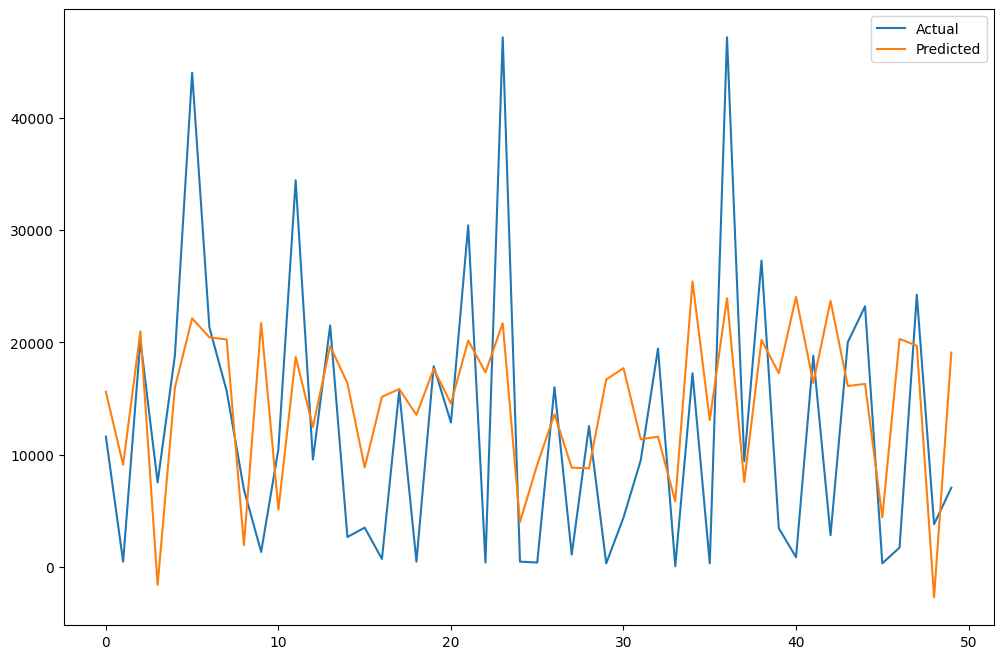

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(LR[:50])
plt.legend(['Actual' , 'Predicted'])

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test	,y_pred)

0.22917026018051934

Random Forest Algorithm

In [ ]:
from sklearn.ensemble import RandomForestRegressor
Rf = RandomForestRegressor(n_estimators = 400,max_depth=15, max_features='log2',random_state=1)
Rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=15, max_features='log2', n_estimators=400,
                      random_state=1)

In [ ]:
y_pred = Rf.predict(x_test)
y_pred = Rf.predict(x_test)
rf= pd.DataFrame({'y_test':y_test,'y_pred':y_pred})
rf.head()

,y_test,y_pred
0,11604.0,14194.337712
1,470.0,1848.521024
2,20162.0,23472.724112
3,7527.0,6634.927566
4,18817.0,10259.283291


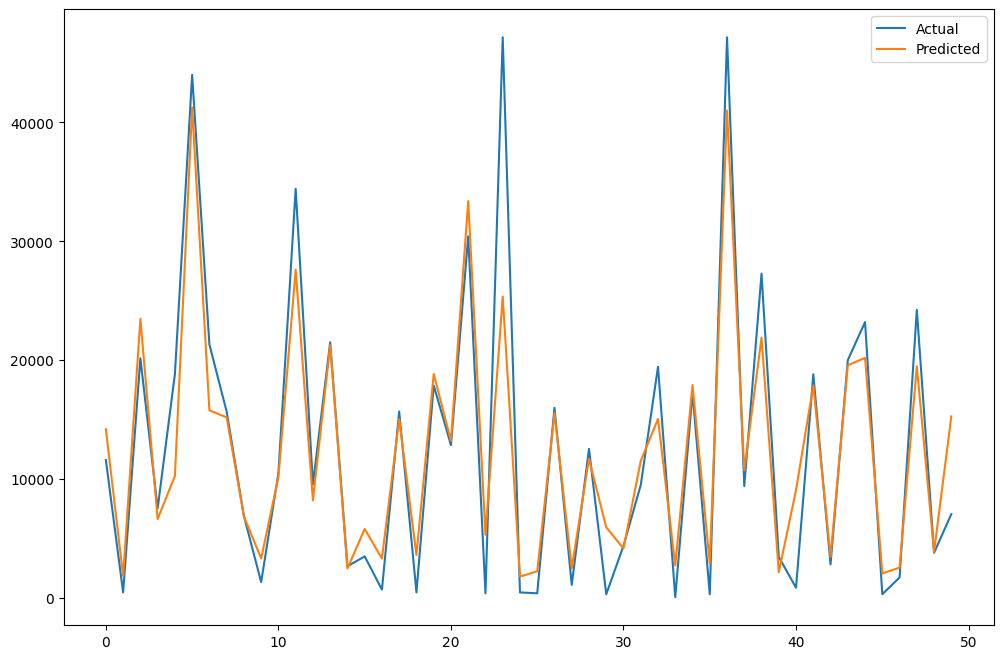

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(rf[:50])
plt.legend(['Actual' , 'Predicted'])

In [ ]:
r2_score(y_test,y_pred)

0.7963959040006852

In [ ]:
pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 77.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.5/140.5 KB 19.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.8/57.8 KB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 KB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.5/129.5 KB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.1/57.1 KB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 53.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 KB 5.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 KB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 KB 21.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 

In [ ]:
import gradio as gr

In [ ]:
import warnings

warnings.filterwarnings('ignore')

In [ ]:
print(data.columns)

Index(['ID', 'Price', 'Levy', 'Manufacturer', 'Model', 'Prod. year',
       'Category', 'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Airbags', 'Age'],
      dtype='object')


In [ ]:
data

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Age
0,45654403,13328.0,1399.0,32,1241,2010,4,1,2,3.5,186005.0,6,0,0,1,0,12,12.0,12
1,44731507,16621.0,1018.0,8,657,2011,4,0,5,3.0,192000.0,6,2,0,1,0,1,8.0,11
2,45774419,8467.0,0.0,21,683,2006,3,0,5,1.3,200000.0,4,3,1,1,1,1,2.0,16
3,45769185,3607.0,862.0,16,660,2011,4,1,2,2.5,168966.0,4,0,0,1,0,14,0.0,11
4,45809263,11726.0,446.0,21,683,2014,3,1,5,1.3,91901.0,4,0,1,1,0,12,4.0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,8467.0,0.0,36,384,1999,1,1,0,2.0,300000.0,4,1,2,0,0,12,5.0,23
19233,45778856,15681.0,831.0,23,1333,2011,9,1,5,2.4,161600.0,4,2,1,1,0,11,8.0,11
19234,45804997,26108.0,836.0,23,1441,2010,4,1,1,2.0,116365.0,4,0,1,1,0,7,4.0,12
19235,45793526,5331.0,1288.0,8,455,2007,4,1,1,2.0,51258.0,4,0,1,1,0,1,4.0,15


In [ ]:
def predict_price(ID, Levy, Manufacturer, Model, Prod_year,Category, Leather_interior, Fuel_type, Engine_volume, Mileage,Cylinders, Gear_box_type, Drive_wheels, Doors, Wheel, Color,Airbags):
  input_array = np.array([[ID, Levy, Manufacturer, Model, Prod_year,Category, Leather_interior, Fuel_type, Engine_volume, Mileage,Cylinders, Gear_box_type, Drive_wheels, Doors, Wheel, Color,Airbags]])
  price= Rf.predict(input_array)
  #output = classify(pred[0])
  return price


In [ ]:
predict_price(45805911,15000,30,1211,2003,9,1,2,4.0,180000,4,0,1,1,1,2.0,1)

ValueError: ignored

To improve the UX

In [ ]:
# Ye cell execute nahi karna hai
ID = gr.inputs.Slider(minimum = 0,maximum = 50000000000, default = 2, label = "ID")
Levy = gr.inputs.Slider(minimum = 0,maximum = 50000000000, default = 2, label = "ID")
Manufacturer = gr.inputs.Slider(minimum = 0,maximum = 50000000000, default = 2, label = "ID")
Model = gr.inputs.Slider(minimum = 0,maximum = 50000000000, default = 2, label = "ID")
Prod_year = gr.inputs.Slider(minimum = 0,maximum = 50000000000, default = 2, label = "ID")
Category = gr.inputs.Slider(minimum = 0,maximum = 50000000000, default = 2, label = "ID")
Leather_interior = gr.inputs.Slider(minimum = 0,maximum = 50000000000, default = 2, label = "ID")
Fuel_type = gr.inputs.Slider(minimum = 0,maximum = 50000000000, default = 2, label = "ID")
Engine_volume = gr.inputs.Slider(minimum = 0,maximum = 50000000000, default = 2, label = "ID")
Mileage = gr.inputs.Slider(minimum = 0,maximum = 50000000000, default = 2, label = "ID")
Cylinders = gr.inputs.Slider(minimum = 0,maximum = 50000000000, default = 2, label = "ID")
Gear_box_type = gr.inputs.Slider(minimum = 0,maximum = 50000000000, default = 2, label = "ID")
Drive_wheels = gr.inputs.Slider(minimum = 0,maximum = 50000000000, default = 2, label = "ID")
Doors = gr.inputs.Slider(minimum = 0,maximum = 50000000000, default = 2, label = "ID")
Wheel = gr.inputs.Slider(minimum = 0,maximum = 50000000000, default = 2, label = "ID")
Color = gr.inputs.Slider(minimum = 0,maximum = 50000000000, default = 2, label = "ID")
Airbags = gr.inputs.Slider(minimum = 0,maximum = 50000000000, default = 2, label = "ID")

In [ ]:
#outputs = gr.outputs.Textbox()
app = gr.Interface(fn = predict_price, inputs=['number','number','number','number','number','number','number','number','number','number','number','number','number','number','number','number','number'], outputs= ['number'],description="This is a car prediction model by R002 Krish Ahuja, R025 Rohan Jain and R028 Aryan Jha")

In [ ]:
app.launch(debug=True, share = True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://4ba7135eee46959082.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces
